In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [67]:
data = pd.read_csv("advertising.csv")
data.shape

(200, 4)

In [68]:
data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [69]:
feature = 'TV'

X = data[[feature]]
Y = data['Sales']


In [70]:

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=100)

model = LinearRegression()

model.fit(x_train, y_train)

LinearRegression()

In [71]:
y_pred = model.predict(x_test)

In [72]:
coefficients = model.coef_

rss = ((y_pred - y_test)**2).sum()

r2 = metrics.r2_score(y_test, y_pred)

print(f'Coefficients is :  {coefficients}')
print(f'Residual sum of squares :  {rss}')
print(f'R2 Score is :  {r2}')


Coefficients is :  [0.0556387]
Residual sum of squares :  318.31875118201606
R2 Score is :  0.7807592057194054


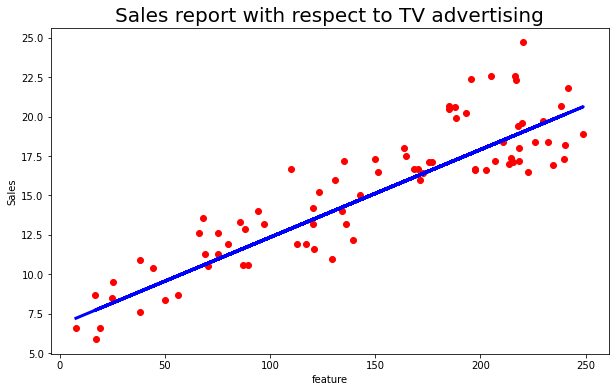

In [73]:
plt.figure(figsize=(10, 6))
plt.scatter(x_test, y_test, color='red')
plt.plot(x_test, y_pred, color='blue', linewidth=3)
plt.xlabel('feature')
plt.ylabel('Sales')
plt.title('Sales report with respect to TV advertising', fontsize=20)
plt.show()